Load and plot distribution


In [1]:
# imports
import os
import matplotlib.pyplot as plt

from utils.util_plot import (
    eval_trial_data,
    plot_time_frechet,
    plot_distance_angle,
    plot_rms,
    scatter_time_frechet, scatter_distance_angle, scatter_rms,
    eval_grid, plot_bayes,
    plot_histogram,
    plot_bayes_score_time, plot_bayes_frechet)

import scienceplots

In [2]:
# DEFINE GLOBAL VARIABLES
WORK_DIR = '/home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results'

DOCS_PATH = '/home/turtlewizard/repos/thesis-mppi-model-ident/msc-docs'
SAVE_PATH = os.path.join(DOCS_PATH, 'plots')
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# first 4 ok, use from [1] for scatter plots
colors = [
    "#1e5167", "#6ab6c7", "#95265c", "#5ab220", "#c86be1",
    "#20f53d", "#e028e5", "#c9dd87", "#4224bf", "#10eddc"]

DPI = 300

# https://github.com/garrettj403/SciencePlots/blob/master/examples/plot-examples.py
CONTEXT_SCIENCE = plt.style.context(['science'])
CONTEXT_SCIENCE_GRID = plt.style.context(['science', 'grid'])
CONTEXT_SCATTER = plt.style.context(['science', 'scatter'])

DEFAULT_MPPI_CRITIC_NAMES = [
    'ConstraintCritic', 'GoalCritic', 'GoalAngleCritic', 'PreferForwardCritic',
    'CostCritic', 'PathAlignCritic', 'PathFollowCritic', 'PathAngleCritic']

In [3]:
# __________ DISTRIBUTION TRIALS __________
waffle_std_path = WORK_DIR + '/default_distribution_2024-11-24_13-23-28'
burger_std_path = WORK_DIR + '/burger_distribution_2024-11-24_14-35-54'
enjoy_std_path = WORK_DIR + '/enjoy_distribution_2024-11-24_14-35-12'
enjoy2_std_path = WORK_DIR + '/enjoy_distribution_w_enjoy_params_2024-12-27_21-09-52'

random_best_path = WORK_DIR + '/test_best_2024-12-29_23-33-47'

waffle_std_data = eval_trial_data(waffle_std_path)
burger_std_data = eval_trial_data(burger_std_path)
enjoy_std_data = eval_trial_data(enjoy_std_path)
enjoy2_std_data = eval_trial_data(enjoy2_std_path)  # 30

random_best_data = eval_trial_data(random_best_path)

trial_datas_std = {
    'waffle': waffle_std_data,
    'burger': burger_std_data,
    'enjoy': enjoy_std_data,
    # 'enjoy2': enjoy2_std_data,
    # 'random_best': random_best_data
}
# KÉSZ

___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/default_distribution_2024-11-24_13-23-28 ___
RUN NAME: default_distribution
Runs/successful: 100/99
Whole run time: 58.66 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/burger_distribution_2024-11-24_14-35-54 ___
RUN NAME: burger_distribution
Runs/successful: 100/98
Whole run time: 57.57 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/enjoy_distribution_2024-11-24_14-35-12 ___
RUN NAME: enjoy_distribution
Runs/successful: 100/100
Whole run time: 59.54 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/enjoy_distribution_w_enjoy_params_2024-12-27_21-09-52 ___
RUN NAME: enjoy_distribution_w_enjoy_params
Runs/successful: 100/94
Whole run time: 132.10 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/test_best_2024-12-29_23-33-47 ___
RUN

+---------+----------------+------------------------+--------------------+
| Label   | Run Time [s]   | Frechet Distance [m]   | Average Cost [-]   |
+=========+================+========================+====================+
| waffle  | 33.76 ± 0.858  | 0.22 ± 0.027           | 11.01 ± 0.109      |
+---------+----------------+------------------------+--------------------+
| burger  | 33.48 ± 0.838  | 0.22 ± 0.016           | 11.01 ± 0.117      |
+---------+----------------+------------------------+--------------------+
| enjoy   | 34.94 ± 0.928  | 0.20 ± 0.018           | 10.85 ± 0.154      |
+---------+----------------+------------------------+--------------------+
+---------+------------------------+-----------------------+
| Label   | Distance to Goal [m]   | Angle to Goal [rad]   |
+=========+========================+=======================+
| waffle  | 0.22 ± 0.013           | 0.11 ± 0.007          |
+---------+------------------------+-----------------------+
| burger  | 0.22 ± 0

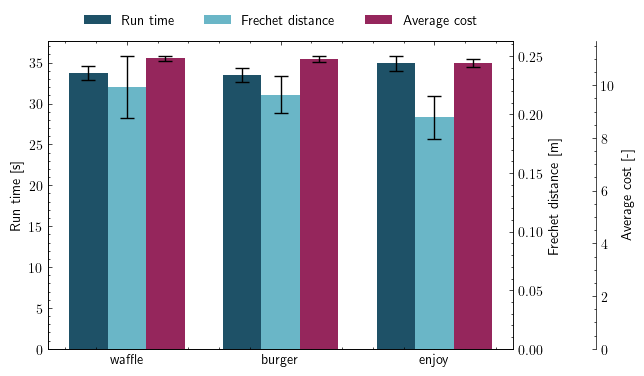

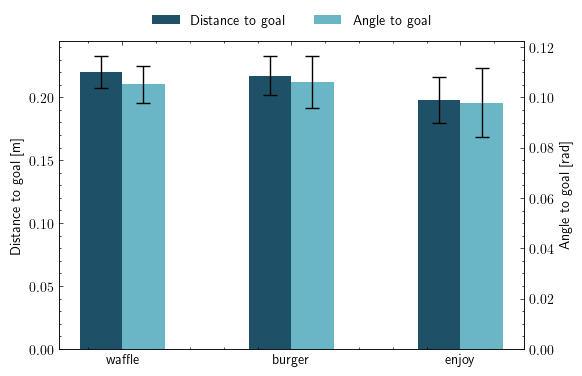

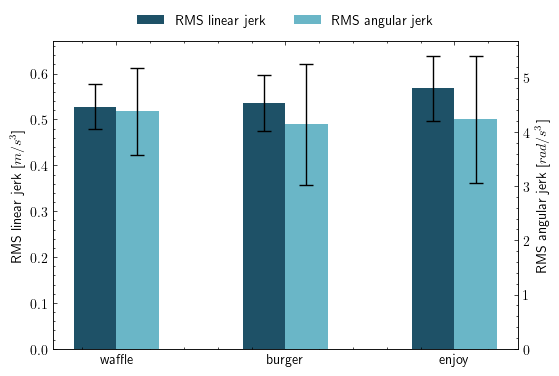

In [4]:
with plt.style.context(['science']):
    std_fig_0 = plot_time_frechet(trial_datas_std)
    std_fig_1 = plot_distance_angle(trial_datas_std)
    std_fig_2 = plot_rms(trial_datas_std)

std_fig_0.savefig(os.path.join(SAVE_PATH, '00_std_fig_0_plot_time_frechet.png'),
                  dpi=DPI, bbox_inches='tight')
std_fig_1.savefig(os.path.join(SAVE_PATH, '01_std_fig_1_plot_distance_angle.png'),
                  dpi=DPI, bbox_inches='tight')
std_fig_2.savefig(os.path.join(SAVE_PATH, '02_std_fig_2_plot_rms.png'),
                  dpi=DPI, bbox_inches='tight')

plt.show()

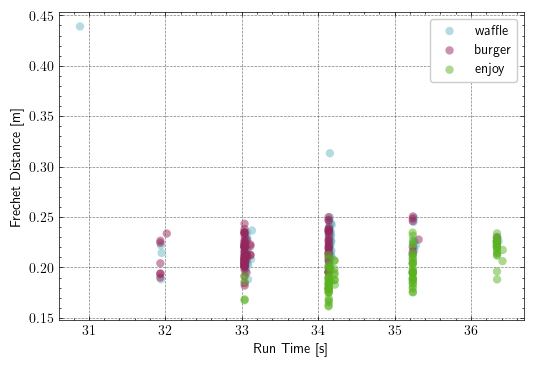

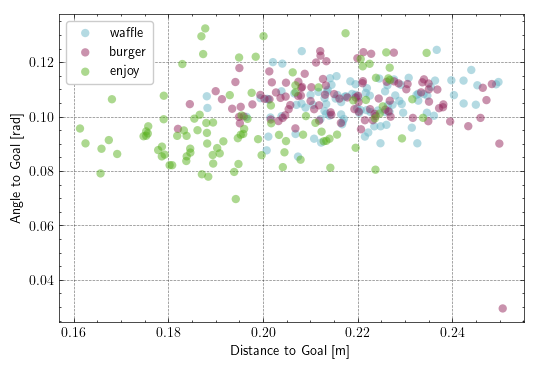

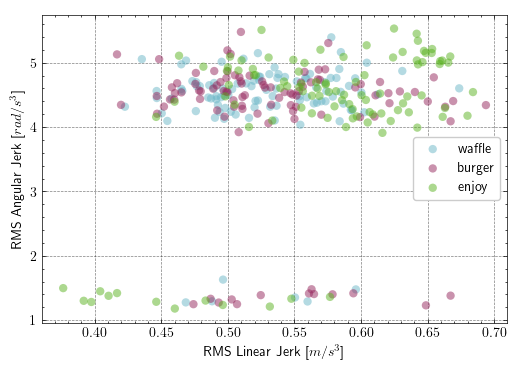

In [5]:
# DEFAULT MPPI CRITICS
# plot the scatter of different robot types

# TODO: kivenni a best-et és külön best-el együtt ábrázolni
with plt.style.context(['science', 'grid']):
    std_fig_3 = scatter_time_frechet(trial_datas_std)
    std_fig_4 = scatter_distance_angle(trial_datas_std)
    std_fig_5 = scatter_rms(trial_datas_std)

std_fig_3.savefig(os.path.join(SAVE_PATH, '03_std_fig_3_scatter_time_frechet.png'),
                  dpi=DPI, bbox_inches='tight')
std_fig_4.savefig(os.path.join(SAVE_PATH, '04_std_fig_4_scatter_distance_angle.png'),
                  dpi=DPI, bbox_inches='tight')
std_fig_5.savefig(os.path.join(SAVE_PATH, '05_std_fig_5_scatter_rms.png'),
                  dpi=DPI, bbox_inches='tight')
plt.show()

# scatter itt nem fontos

In [6]:
# __________ RANDOM TRIALS __________
waffle_rand100_path = WORK_DIR + '/waffle_random_2024-12-28_12-42-49'
waffle_rand500_path = WORK_DIR + '/waffle_random_big_2024-12-28_15-49-04'

waffle_rand100_data = eval_trial_data(waffle_rand100_path)
waffle_rand500_data = eval_trial_data(waffle_rand500_path)

trial_datas_rand = {
    'waffle_random500': waffle_rand500_data,
    'waffle_random100': waffle_rand100_data,
    'waffle_default': waffle_std_data,
}

enjoy_rand100_path = WORK_DIR + '/enjoy_random_small_2024-12-28_23-55-11'
enjoy_rand500_path = WORK_DIR + '/enjoy_random_2024-12-28_23-55-20'

enjoy_rand100_data = eval_trial_data(enjoy_rand100_path)
enjoy_rand500_data = eval_trial_data(enjoy_rand500_path)
# KÉSZ

___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/waffle_random_2024-12-28_12-42-49 ___
RUN NAME: waffle_random
Runs/successful: 100/81
Whole run time: 50.48 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/waffle_random_big_2024-12-28_15-49-04 ___
RUN NAME: waffle_random
Runs/successful: 500/399
Whole run time: 253.18 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/enjoy_random_small_2024-12-28_23-55-11 ___
RUN NAME: enjoy_random_small
Runs/successful: 100/87
Whole run time: 51.87 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/enjoy_random_2024-12-28_23-55-20 ___
RUN NAME: enjoy_random
Runs/successful: 500/412
Whole run time: 259.36 [mins]


In [7]:
import pandas as pd
import pickle
from utils.controller_metrics import ControllerMetric
import os

waffle_rand500_final_path = os.path.join(waffle_rand500_path, 'final_results.csv')
waffle_rand500_df = pd.read_csv(waffle_rand500_final_path)


def get_best_from_random_search(trial_path, df) -> dict[str, float]:
    trial_ids = []
    rows = []
    times = []
    frechets = []
    costs = []
    distances = []
    angles = []

    lin_jerks = []
    ang_jerks = []

    # Get the best trial
    # calculate the best trial
    trials_scores: dict[str, float] = {}
    for row, trial in enumerate(df.itertuples()):
        # print(f"Processing trial {trial.id}")
        # print(f"r: {row}, id: {trial.id}")
        if trial.success is False:
            print(f"Trial {trial.Index} failed")
            continue

        metric_path = os.path.join(
            trial_path, 'metrics', os.path.basename(trial.metric_path))

        if not os.path.exists(metric_path):
            print(f"Metric not found: {metric_path}")
            continue

        with open(metric_path, 'rb') as file:
            m: ControllerMetric = pickle.load(file)

            time = m.time_elapsed
            frechet = m.frechet_distance
            cost = m.avg_cost
            distance = m.distance_to_goal
            angle = abs(m.angle_to_goal)

            appended_id = int(trial.id) if trial.id != 'reference' else 0
            trial_ids.append(appended_id)
            rows.append(row)
            times.append(time)
            frechets.append(frechet)
            costs.append(cost)
            distances.append(distance)
            angles.append(angle)
            lin_jerks.append(m.rms_linear_jerk)
            ang_jerks.append(m.rms_angular_jerk)

    normalized_times = [t / max(times) for t in times]
    normalized_frechets = [f / max(frechets) for f in frechets]
    normalized_costs = [c / max(costs) for c in costs]
    normalized_distances = [d / max(distances) for d in distances]
    normalized_angles = [a / max(angles) for a in angles]

    for r in rows:
        time = normalized_times[r]
        frechet = normalized_frechets[r]
        cost = normalized_costs[r]
        distance = normalized_distances[r]
        angle = normalized_angles[r]

        score = (time**2 + frechet**2 + cost**2 + distance**2 + angle**2)**0.5

        trials_scores.update({r: score})

    sorted_trials_scores = dict(sorted(trials_scores.items(), key=lambda item: item[1]))
    return sorted_trials_scores, times, frechets, costs, distances, angles, \
        lin_jerks, ang_jerks, trial_ids


best_randoms, times, frechets, costs, distances, angles, lin_jerks, ang_jerks, trial_ids = get_best_from_random_search(
    waffle_rand500_path, waffle_rand500_df)
print(best_randoms)

best_row = list(best_randoms.keys())[0]
waffle_rand100_best_value = best_randoms[best_row]

print(f'Best ROW: {best_row} - id: {trial_ids[best_row]} with value: {waffle_rand100_best_value}')

print(f"best values [{trial_ids[best_row]}]: {times[best_row]}, {frechets[best_row]}"
      f", {costs[best_row]}, {distances[best_row]}"
      f", {angles[best_row]}")

# print(f"len: {len(times)}, {len(frechets)}, {len(costs)}, {len(distances)}, {len(angles)}")
best_time_frechet = (
    times[best_row], frechets[best_row])
best_distance_angle = (
    distances[best_row], angles[best_row])
best_jerk = (lin_jerks[best_row], ang_jerks[best_row])

print(f'best_time_frechet: {best_time_frechet}')
print(f'best_distance_angle: {best_distance_angle}')

print(
    f"Max values:\n time: {max(times)}\n frechet: {max(frechets)}\n cost: {max(costs)}\n distance: {max(distances)}\n angle: {max(angles)}")
# metric_264.pickle

{211: 0.9828495223495078, 336: 1.0129167412206432, 293: 1.0278034295343064, 58: 1.0290161590444535, 281: 1.0294833917384978, 77: 1.0328093257525757, 316: 1.0416389593993052, 237: 1.0548601947509613, 241: 1.0632930236828761, 9: 1.0650705602549364, 35: 1.0650848476179697, 155: 1.0653024949995196, 308: 1.067708672985943, 315: 1.0682313552163039, 356: 1.0688230824416511, 248: 1.0713678691844344, 44: 1.0732364602321411, 192: 1.075844972622423, 33: 1.0787825396865176, 95: 1.0798069142210698, 151: 1.0825663454644434, 370: 1.0864112335633331, 255: 1.0953599616544445, 325: 1.1013936335636039, 384: 1.1023685562355157, 130: 1.1027916046768915, 267: 1.1043867587296676, 260: 1.1088651471604138, 215: 1.1096454152917525, 280: 1.1104124536800617, 367: 1.118666958485969, 263: 1.1208090108513928, 166: 1.1212683457823698, 394: 1.1263816903442418, 338: 1.1287689556732734, 152: 1.1361593653200506, 141: 1.1402365863304453, 149: 1.1403283948583929, 217: 1.1405102670311102, 150: 1.1428052676129565, 298: 1.143

In [8]:
# try loading the best
OPTIMIZATION_OUTPUT_PATH = '/home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results'

BEST_ROW = 211
BEST_ROW += 2
BEST_ID = 264
FINAL_CSV_PATH = os.path.join(
    OPTIMIZATION_OUTPUT_PATH,
    'waffle_random_big_2024-12-28_15-49-04',
    'final_results.csv')

header = pd.read_csv(FINAL_CSV_PATH, nrows=0)
best_row = pd.read_csv(
    FINAL_CSV_PATH, skiprows=BEST_ROW - 1, nrows=1, header=None)
best_row.columns = header.columns

print(best_row)
metric_path = best_row.iloc[0]['metric_path']
print(metric_path)

for critic in DEFAULT_MPPI_CRITIC_NAMES:
    best_row.iloc[0][f'{critic}.cost_weight']
    print(f'{critic}: {best_row.iloc[0][f"{critic}.cost_weight"]}')

    id  success  time_elapsed     score  distance_to_goal  angle_to_goal  \
0  264     True     26.430801  0.197925          0.028383       0.049525   

    avg_cost  rms_linear_jerk  rms_angular_jerk  \
0  10.990417         6.676535         26.794031   

                                         metric_path  ...  \
0  /home/turtlewizard/thesis-mppi-model-ident/opt...  ...   

   PreferForwardCritic.cost_weight  PreferForwardCritic.cost_power  \
0                             97.0                               1   

   CostCritic.cost_weight  CostCritic.cost_power  PathAlignCritic.cost_weight  \
0                    67.2                      1                         98.5   

   PathAlignCritic.cost_power  PathFollowCritic.cost_weight  \
0                           1                          28.6   

   PathFollowCritic.cost_power  PathAngleCritic.cost_weight  \
0                            1                          6.2   

   PathAngleCritic.cost_power  
0                           1  

/home/turtlewizard/repos/thesis-mppi-model-ident/workspace/src/controller_optimization/utils/util_plot.py:365: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/home/turtlewizard/repos/thesis-mppi-model-ident/workspace/src/controller_optimization/utils/util_plot.py:390: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/home/turtlewizard/repos/thesis-mppi-model-ident/workspace/src/controller_optimization/utils/util_plot.py:415: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


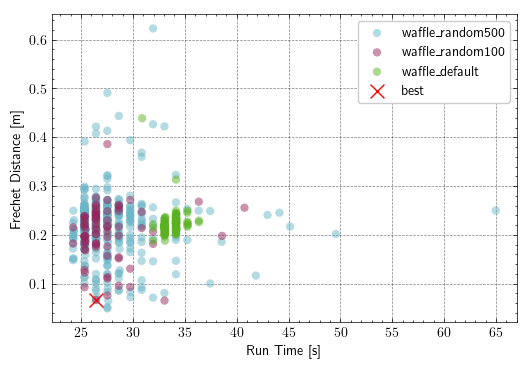

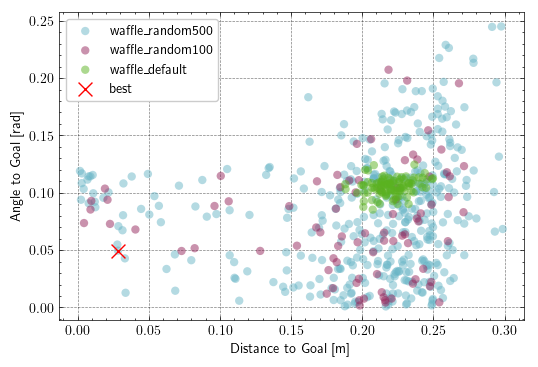

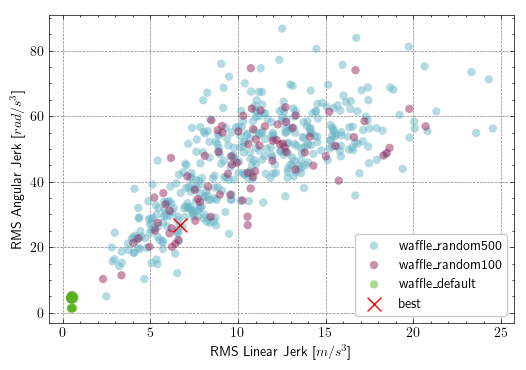

In [9]:
# create a scatter plot
# RANDOM
with plt.style.context(['science', 'grid']):
    rand_fig_0 = scatter_time_frechet(trial_datas_rand, best_coordinates=best_time_frechet)
    rand_fig_1 = scatter_distance_angle(trial_datas_rand, best_coordinates=best_distance_angle)
    rand_fig_2 = scatter_rms(trial_datas_rand, best_coordinates=best_jerk)

rand_fig_0.savefig(os.path.join(
    SAVE_PATH, '10_rand_fig_0_scatter_time_frechet.png'), dpi=DPI, bbox_inches='tight')
rand_fig_1.savefig(os.path.join(
    SAVE_PATH, '11_rand_fig_1_scatter_distance_angle.png'), dpi=DPI, bbox_inches='tight')
rand_fig_2.savefig(os.path.join(SAVE_PATH, '12_rand_fig_2_scatter_rms.png'),
                   dpi=DPI, bbox_inches='tight')

# with plt.style.context(['science']):
#     rand_fig_3 = plot_time_frechet(trial_datas_rand)
#     rand_fig_4 = plot_distance_angle(trial_datas_rand)
#     rand_fig_5 = plot_rms(trial_datas_rand)

# rand_fig_3.savefig(os.path.join(SAVE_PATH, '13_rand_fig_3_plot_time_frechet.png'),
#                    dpi=DPI, bbox_inches='tight')
# rand_fig_4.savefig(os.path.join(SAVE_PATH, '14_rand_fig_4_plot_distance_angle.png'),
#                    dpi=DPI, bbox_inches='tight')
# rand_fig_5.savefig(os.path.join(SAVE_PATH, '15_rand_fig_5_plot_rms.png'),
#                    dpi=DPI, bbox_inches='tight')
plt.show()

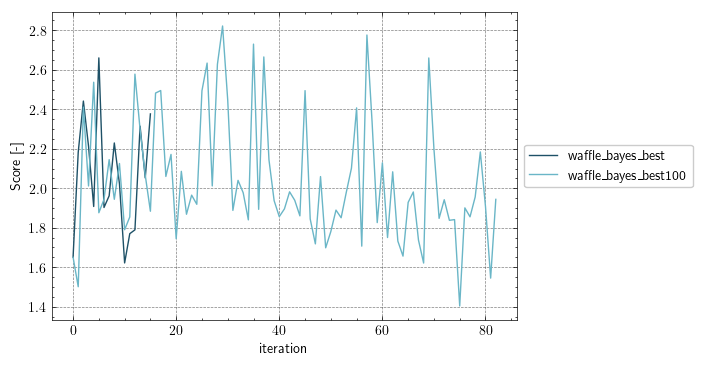

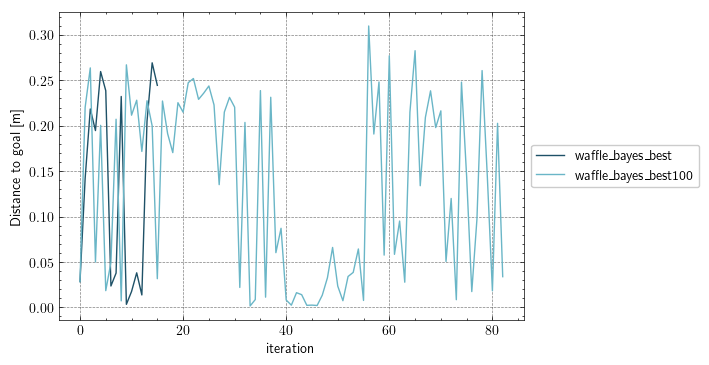

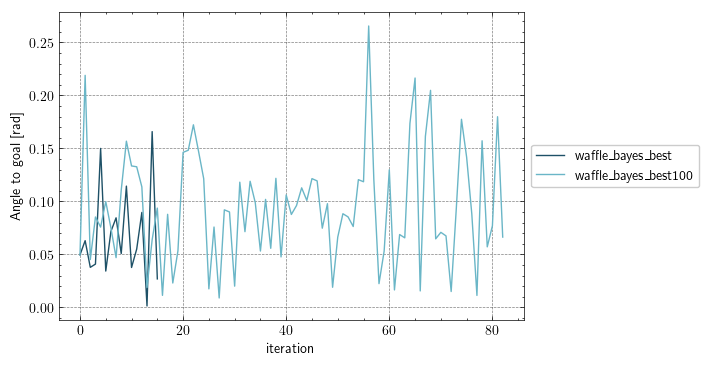

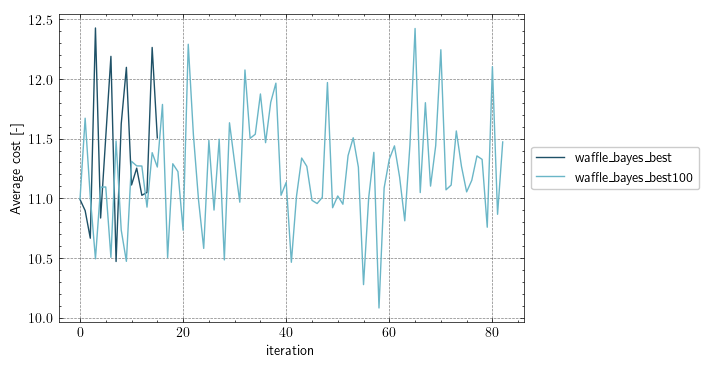

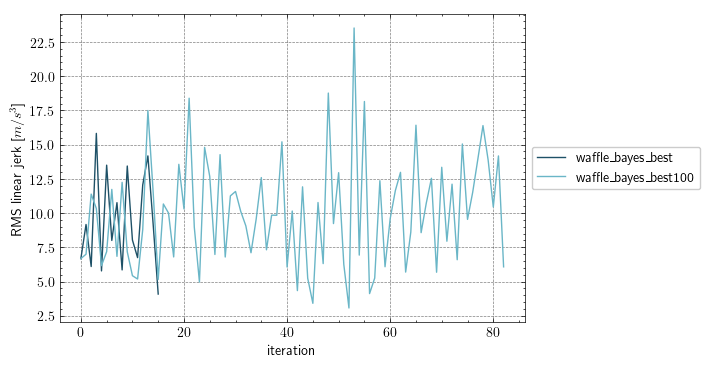

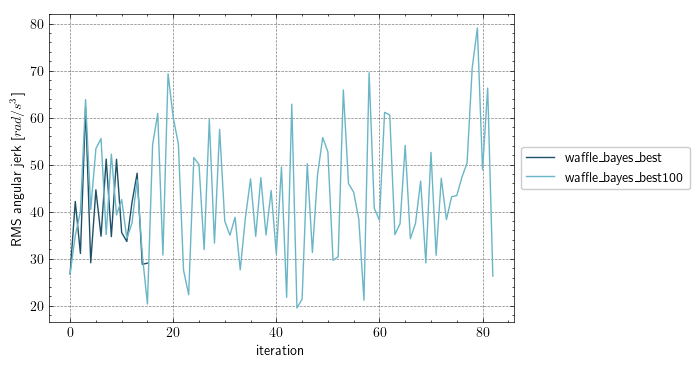

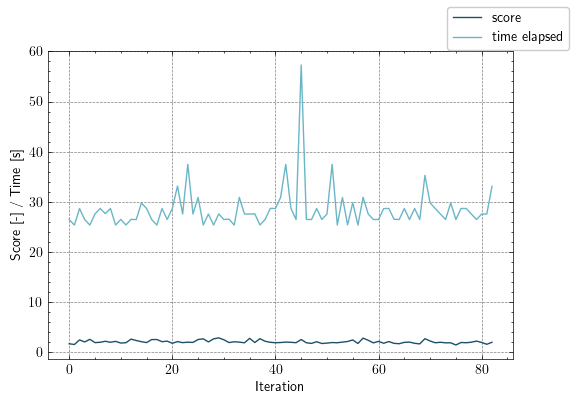

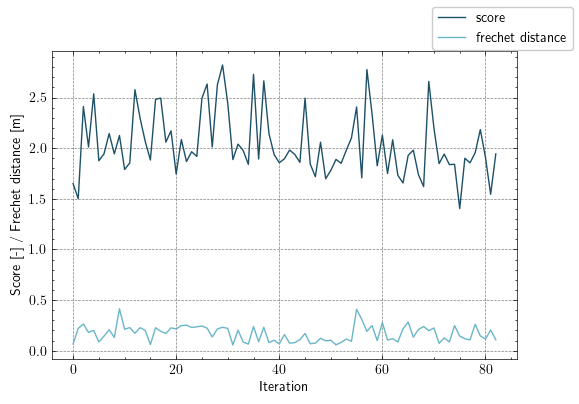

In [10]:
# CHECK THE BEST RANDOM START FOR BAYES
best_bayes20_path = WORK_DIR + '/waffle_bayes_best_2024-12-29_22-22-07'
best_bayes100_path = WORK_DIR + '/waffle_bayes_best_2024-12-29_23-23-28'

best_bayes20_data = pd.read_csv(
    os.path.join(best_bayes20_path, 'final_results.csv'))
best_bayes20_data['angle_to_goal'] = best_bayes20_data['angle_to_goal'].abs()

best_bayes100_data = pd.read_csv(
    os.path.join(best_bayes100_path, 'final_results.csv'))
best_bayes100_data['angle_to_goal'] = best_bayes100_data['angle_to_goal'].abs()

datas_bayes_best = {
    'waffle_bayes_best': best_bayes20_data,
    'waffle_bayes_best100': best_bayes100_data,
}

with plt.style.context(['science', 'grid']):
    figures_bayes_best = plot_bayes(datas_bayes_best, colors)
    fig_bayes_best_score_time = plot_bayes_score_time(best_bayes100_data, colors)
    fig_bayes_best_frechet = plot_bayes_frechet(best_bayes100_data, colors)

plt.show()

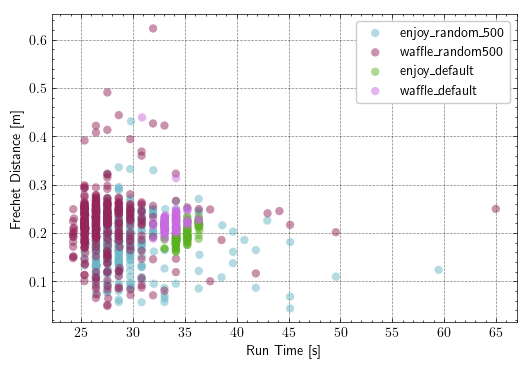

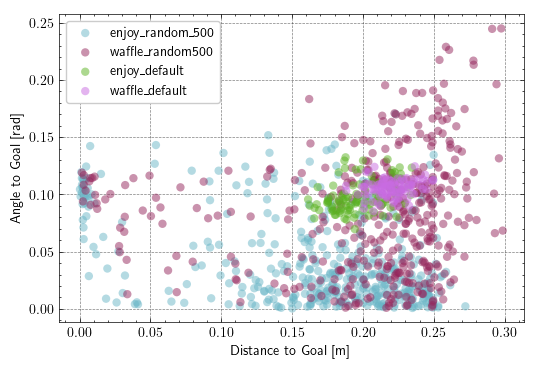

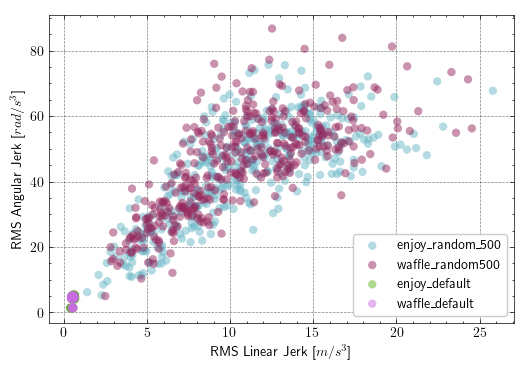

In [11]:
# plot the random result of enjoy
trial_datas_rand_enjoy = {
    'enjoy_random_500': enjoy_rand500_data,
    # 'enjoy_random_100': enjoy_rand100_data,
    'waffle_random500': waffle_rand500_data,
    # 'waffle_random100': waffle_rand100_data,
    'enjoy_default': enjoy_std_data,
    'waffle_default': waffle_std_data,
}

with plt.style.context(['science', 'grid']):
    rand_fig_6 = scatter_time_frechet(trial_datas_rand_enjoy)
    rand_fig_7 = scatter_distance_angle(trial_datas_rand_enjoy)
    rand_fig_8 = scatter_rms(trial_datas_rand_enjoy)

rand_fig_6.savefig(os.path.join(
    SAVE_PATH, '16_rand_fig_6_scatter_time_frechet_enjoy.png'), dpi=DPI, bbox_inches='tight')
rand_fig_7.savefig(os.path.join(
    SAVE_PATH, '17_rand_fig_7_scatter_distance_angle_enjoy.png'), dpi=DPI, bbox_inches='tight')
rand_fig_8.savefig(os.path.join(SAVE_PATH, '18_rand_fig_8_scatter_rms_enjoy.png'),
                   dpi=DPI, bbox_inches='tight')
plt.show()

# nem lényeges mert enjoy random

In [12]:
# __________ GRID TRIALS __________
waffle_grid_path = WORK_DIR + '/waffle_grid_2024-12-28_12-42-57'
waffle_grid_data = eval_trial_data(waffle_grid_path)
# KÉSZ

___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/waffle_grid_2024-12-28_12-42-57 ___
RUN NAME: waffle_grid
Runs/successful: 808/688
Whole run time: 477.24 [mins]


___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/waffle_grid_2024-12-28_12-42-57 ___
RUN NAME: waffle_grid
Runs/successful: 808/688
Whole run time: 477.24 [mins]
Plotting time_elapsed
Plotting distance_to_goal
Plotting angle_to_goal
Plotting avg_cost
Plotting rms_linear_jerk
Plotting rms_angular_jerk


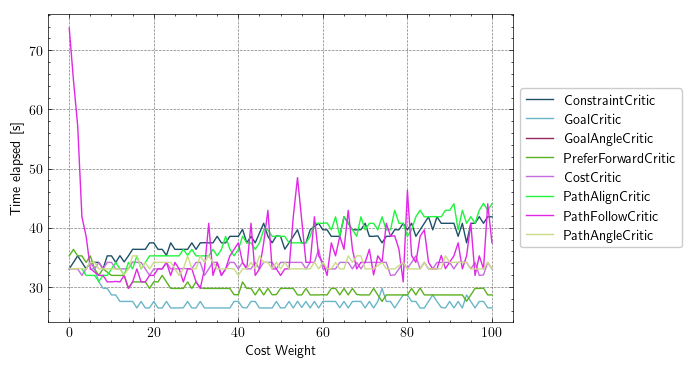

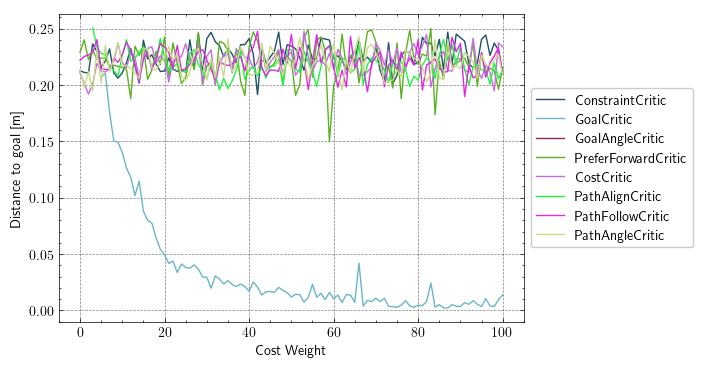

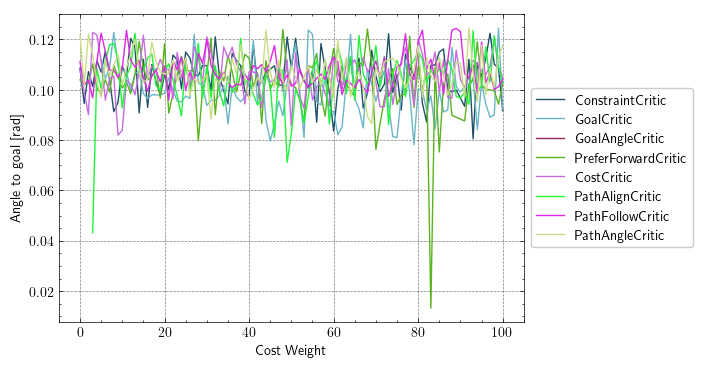

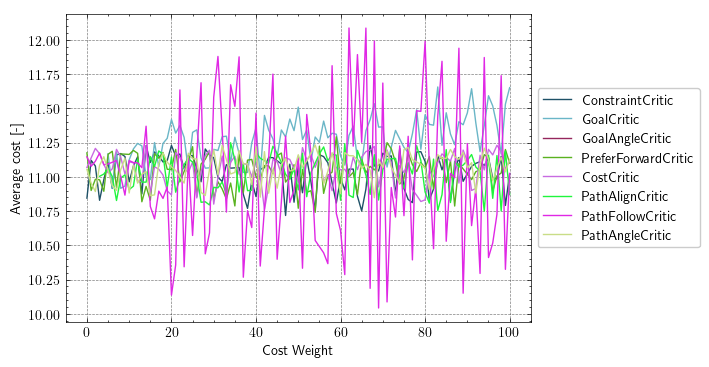

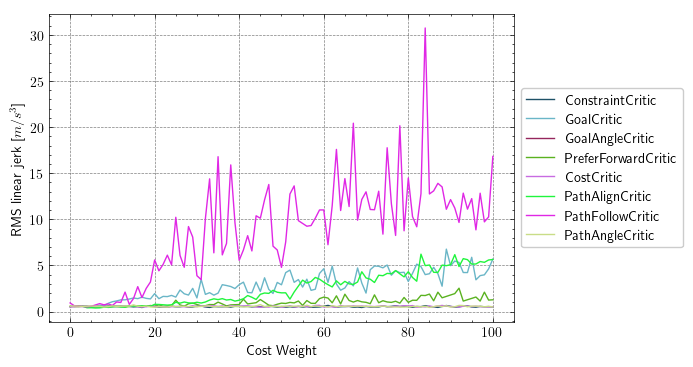

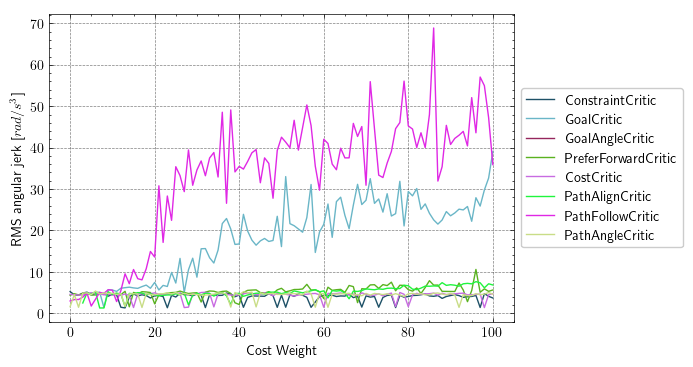

In [13]:
# no GoalAngleCritic
with plt.style.context(['science', 'grid']):
    figures = eval_grid(
        waffle_grid_path, DEFAULT_MPPI_CRITIC_NAMES, colors=colors)

for i, fig in enumerate(figures):
    fig.savefig(os.path.join(
        SAVE_PATH, f'2{i}_grid_fig_{i}_eval_grid.png'), dpi=DPI, bbox_inches='tight')
plt.show()

# nem lényeges mert grid inkonklúzív

In [14]:
import pandas as pd
# __________ SIMPLE BAYESIAN __________
waffle_bayes_time_path = WORK_DIR + '/waffle_bayes_time_2024-12-29_11-50-17'
waffle_bayes_frechet_path = WORK_DIR + '/waffle_bayes_f_2024-12-29_11-49-48'

waffle_bayes_time_data = pd.read_csv(os.path.join(waffle_bayes_time_path, 'final_results.csv'))
# angle_to_goal absolute
waffle_bayes_time_data['angle_to_goal'] = waffle_bayes_time_data['angle_to_goal'].abs()

waffle_bayes_frechet_data = pd.read_csv(os.path.join(
    waffle_bayes_frechet_path, 'final_results.csv'))
waffle_bayes_frechet_data['angle_to_goal'] = waffle_bayes_frechet_data['angle_to_goal'].abs()


# __________ BAYESIAN __________
waffle_bayesian100_path = WORK_DIR + '/waffle_bayesian_2024-12-28_15-47-40'
waffle_bayesian500_path = WORK_DIR + '/waffle_bayesian_big_2024-12-29_00-12-41'
# enjoy_bayesian100_path = WORK_DIR + ''
enjoy_bayesian500_path = WORK_DIR + '/enjoy_bayesian_big_2024-12-29_00-13-34'

# enjoy_bayesian100_data = pd.read_csv(os.path.join(enjoy_bayesian100_path, 'final_results.csv'))
enjoy_bayesian500_data = pd.read_csv(os.path.join(enjoy_bayesian500_path, 'final_results.csv'))
waffle_bayesian100_data = pd.read_csv(os.path.join(waffle_bayesian100_path, 'final_results.csv'))
waffle_bayesian500_data = pd.read_csv(os.path.join(waffle_bayesian500_path, 'final_results.csv'))

# angle_to_goal absolute
enjoy_bayesian500_data['angle_to_goal'] = enjoy_bayesian500_data['angle_to_goal'].abs()
waffle_bayesian100_data['angle_to_goal'] = waffle_bayesian100_data['angle_to_goal'].abs()
waffle_bayesian500_data['angle_to_goal'] = waffle_bayesian500_data['angle_to_goal'].abs()

datas_bayes = {
    'waffle_bayesian500': waffle_bayesian500_data,
    'enjoy_bayesian500': enjoy_bayesian500_data,
    'waffle_bayesian100': waffle_bayesian100_data,
    # 'enjoy_bayesian100': enjoy_bayesian100_data,
}
# KÉSZ

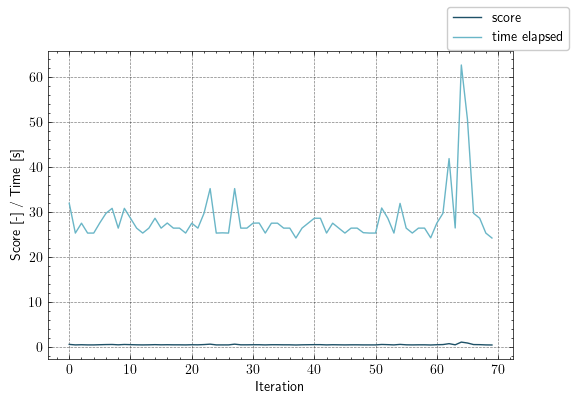

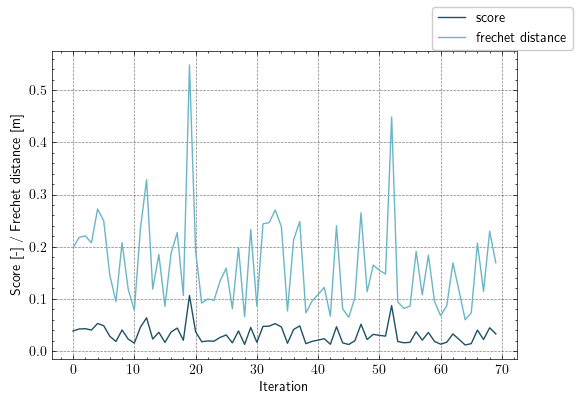

In [15]:
# eval simple bayesian
# plot x: iterations, y1: time, y2: score
import numpy as np
with plt.style.context(['science', 'grid']):
    fig_bayes_0 = plot_bayes_score_time(waffle_bayes_time_data)
    fig_bayes_0.savefig(os.path.join(
        SAVE_PATH, '30_bayes_fig_0_eval_bayes_time.png'), dpi=DPI, bbox_inches='tight')

    fig_bayes_1 = plot_bayes_frechet(waffle_bayes_frechet_data)
    fig_bayes_1.savefig(os.path.join(
        SAVE_PATH, '31_bayes_fig_1_eval_bayes_frechet.png'), dpi=DPI, bbox_inches='tight')

plt.show()

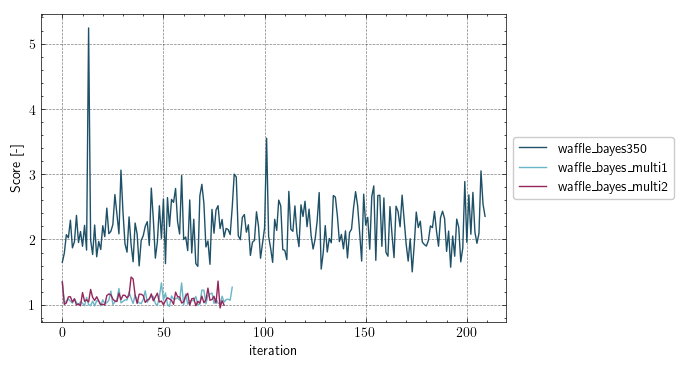

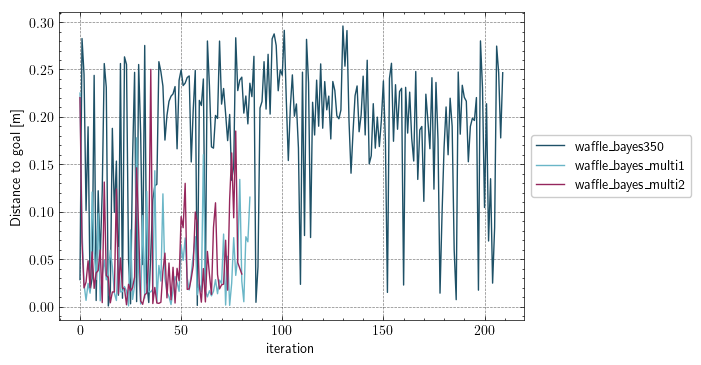

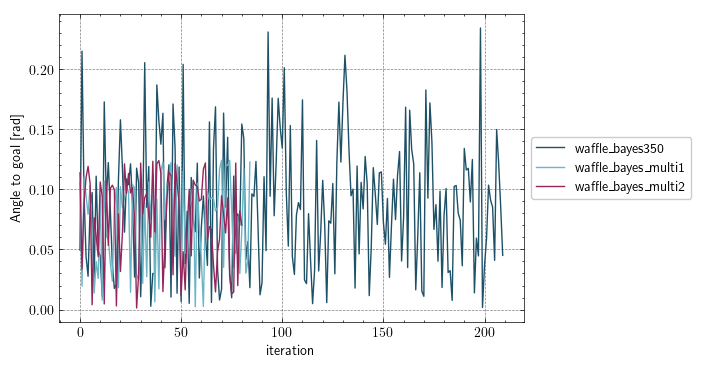

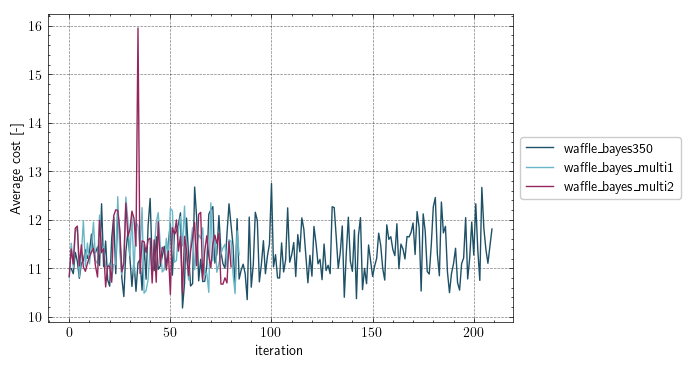

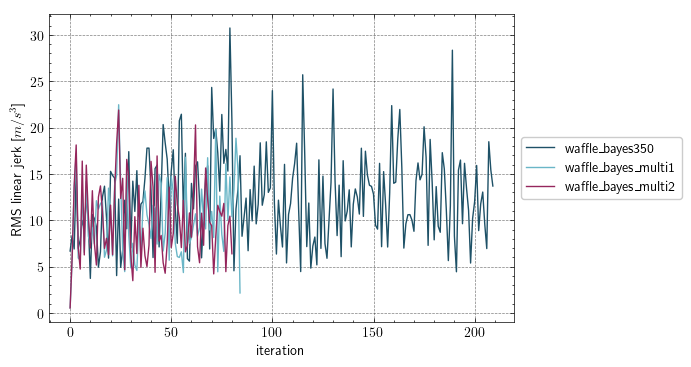

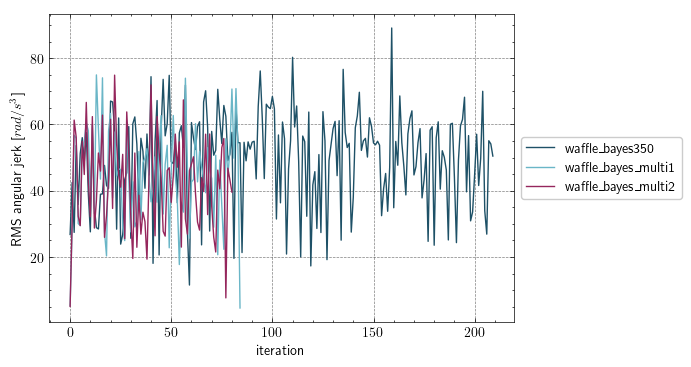

In [ ]:
# BEST STARTING BAYESIAN

waffle_bayes350_path = WORK_DIR + '/waffle_bayes_best_mid_2024-12-29_23-24-49'
waffle_bayes100_multi1_path = WORK_DIR + '/bayes_feed_2024-12-30_02-26-08'
waffle_bayes100_multi2_path = WORK_DIR + '/bayes_feed_2024-12-30_01-12-05'

waffle_bayes350_data = pd.read_csv(os.path.join(waffle_bayes350_path, 'final_results.csv'))
waffle_bayes350_data['angle_to_goal'] = waffle_bayes350_data['angle_to_goal'].abs()

waffle_bayes100_multi1_data = pd.read_csv(os.path.join(
    waffle_bayes100_multi1_path, 'final_results.csv'))
waffle_bayes100_multi1_data['angle_to_goal'] = waffle_bayes100_multi1_data['angle_to_goal'].abs()

waffle_bayes100_multi2_data = pd.read_csv(os.path.join(
    waffle_bayes100_multi2_path, 'final_results.csv'))
waffle_bayes100_multi2_data['angle_to_goal'] = waffle_bayes100_multi2_data['angle_to_goal'].abs()

datas_bayes_best = {
    'waffle_bayes350': waffle_bayes350_data,
    'waffle_bayes_multi1': waffle_bayes100_multi1_data,
    'waffle_bayes_multi2': waffle_bayes100_multi2_data,
}

with plt.style.context(['science', 'grid']):
    figures_bayes_best = plot_bayes(datas_bayes_best, colors)

    # fig_bayes_best_score_time = plot_bayes_score_time(waffle_bayes350_data, colors)
    # fig_bayes_best_frechet = plot_bayes_frechet(waffle_bayes350_data, colors)

for fig in figures_bayes_best:
    fig.savefig(os.path.join(SAVE_PATH, f'8_bayes_best_fig_{fig}.png'),
                dpi=DPI, bbox_inches='tight')

# do plots for waffle_bayes_best_mid_2024-12-29_23-24-49
# best score 0.9512033855536297 from multi2

best_std_path = WORK_DIR + '/best_best_2024-12-30_05-22-07'
best_std_data = eval_trial_data(best_std_path)

trial_datas_best = {
    'waffle_best': best_std_data,
    'waffle_default': waffle_std_data,
}

with plt.style.context(['science']):
    fig_best0 = plot_time_frechet(trial_datas_best)
    fig_best1 = plot_distance_angle(trial_datas_best)
    fig_best2 = plot_rms(trial_datas_best)

fig_best0.savefig(
    os.path.join(SAVE_PATH, '90_best_fig_0_plot_time_frechet.png'),
    dpi=DPI, bbox_inches='tight')

fig_best1.savefig(
    os.path.join(SAVE_PATH, '91_best_fig_1_plot_distance_angle.png'),
    dpi=DPI, bbox_inches='tight')

fig_best2.savefig(
    os.path.join(SAVE_PATH, '92_best_fig_2_plot_rms.png'),
    dpi=DPI, bbox_inches='tight')


plt.show()

In [29]:
# best score 0.9512033855536297 from multi2

DIR = WORK_DIR + '/bayes_feed_2024-12-30_01-12-05'
CSV = DIR + '/final_results.csv'

df = pd.read_csv(CSV)

# get row of max score
max_score = df['score'].max()
row = df[df['score'] == max_score]
print(f'Max score: {row}')

for critic in DEFAULT_MPPI_CRITIC_NAMES:
    print(f'critic: {critic}, weight: {row.iloc[0][f"{critic}.cost_weight"]}')

Max score:     id  success  time_elapsed     score  frechet_distance  distance_to_goal  \
34  41     True     29.746847  1.424685          0.264328          0.054525   

    angle_to_goal   avg_cost  rms_linear_jerk  rms_angular_jerk  ...  \
34       0.078802  15.954236        13.766406         38.611829  ...   

   PreferForwardCritic.cost_weight  PreferForwardCritic.cost_power  \
34                       41.294129                               1   

    CostCritic.cost_weight  CostCritic.cost_power  \
34                     0.0                      1   

    PathAlignCritic.cost_weight  PathAlignCritic.cost_power  \
34                        100.0                           1   

    PathFollowCritic.cost_weight  PathFollowCritic.cost_power  \
34                     56.569456                            1   

    PathAngleCritic.cost_weight  PathAngleCritic.cost_power  
34                          0.0                           1  

[1 rows x 27 columns]
critic: ConstraintCritic, weight

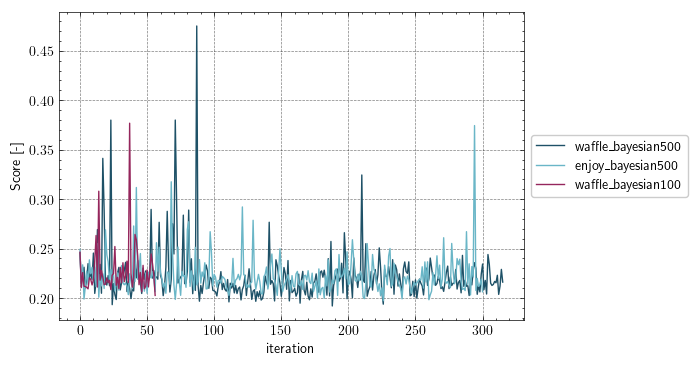

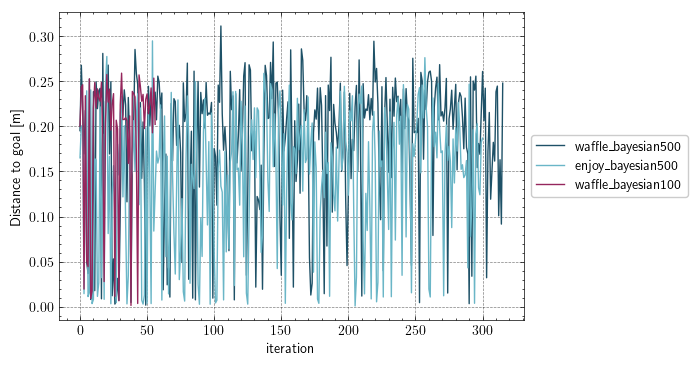

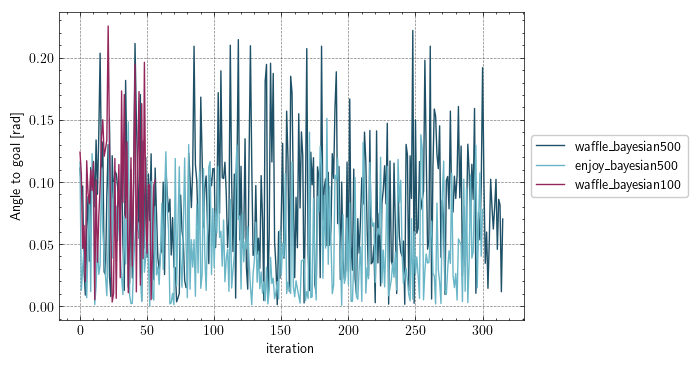

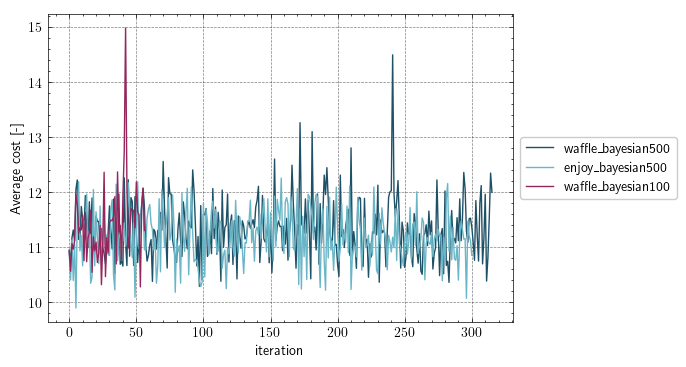

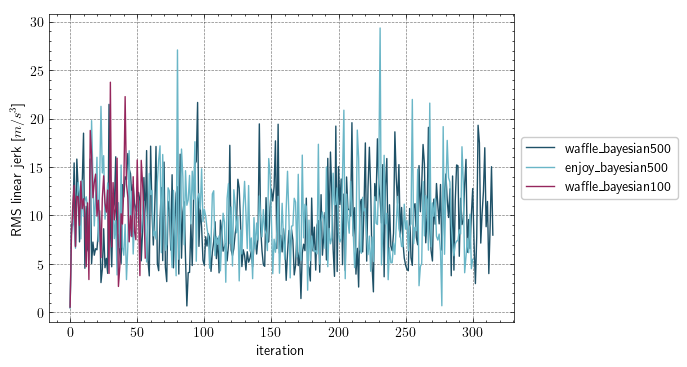

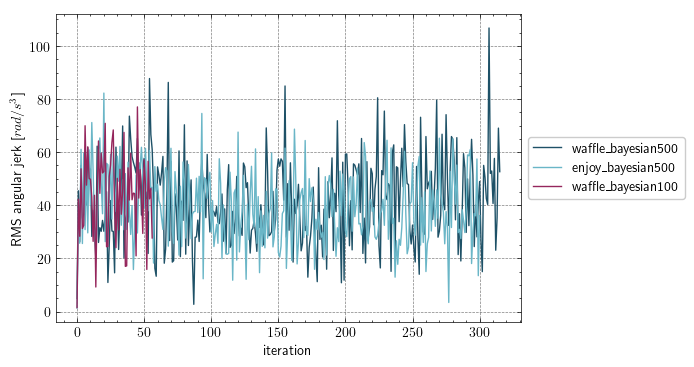

In [17]:
# eval bayesian optimization
# use trial_datas_bayesian
from utils.util_plot import plot_bayes
with plt.style.context(['science', 'grid']):
    figures2 = plot_bayes(datas_bayes, colors)

for i, fig in enumerate(figures2):
    fig.savefig(os.path.join(
        SAVE_PATH, f'4{i}_bayes_fig_{i}_plot_bayes.png'), dpi=DPI, bbox_inches='tight')
plt.show()

/home/turtlewizard/repos/thesis-mppi-model-ident/workspace/src/controller_optimization/utils/util_plot.py:584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  critics_df.rename(columns=renamed_columns, inplace=True)


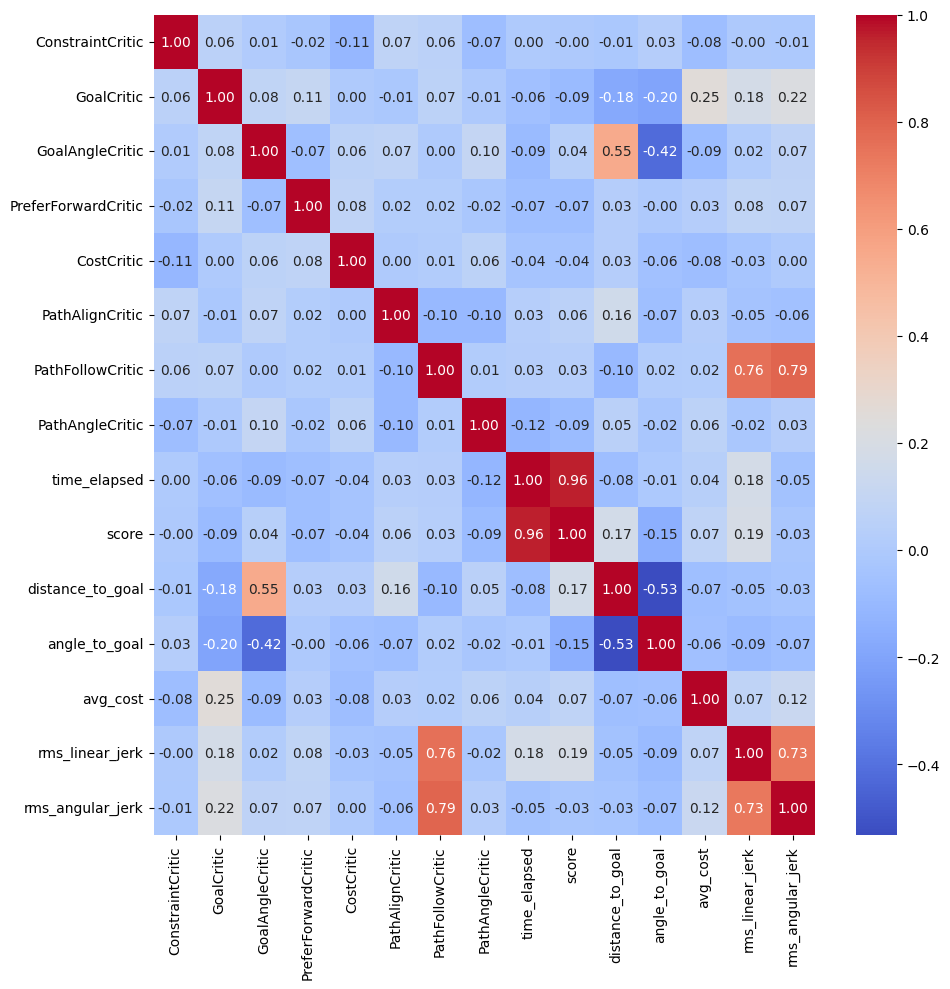

In [18]:
# __________ CORRELATION __________
# Load the data
fig_heatmap = plot_histogram(os.path.join(waffle_rand500_path, 'final_results.csv'))
fig_heatmap.savefig(os.path.join(SAVE_PATH, "50_correlation_heatmap.png"),
                    dpi=DPI, bbox_inches='tight')

plt.show()

In [19]:
print(DEFAULT_MPPI_CRITIC_NAMES)

['ConstraintCritic', 'GoalCritic', 'GoalAngleCritic', 'PreferForwardCritic', 'CostCritic', 'PathAlignCritic', 'PathFollowCritic', 'PathAngleCritic']


In [20]:
import os
import pandas as pd
import pickle
do_this = False
if do_this is True:
    def score_avarage(metric: ControllerMetric) -> float:
        # SMALLER IS BETTER
        # Average values got from distribution
        avg_time = 35.0
        avg_frechet = 0.22
        avg_cost = 11.0
        avg_distance = 0.22
        avg_angle = 0.11

        # Max values are 2 times the average
        max_time = 65.0
        max_frechet = 0.62
        max_cost = 13
        max_distance = 0.3
        max_angle = 0.25

        # Normalize values
        norm_time = metric.time_elapsed / max_time
        norm_frechet = metric.frechet_distance / max_frechet
        norm_cost = metric.avg_cost / max_cost
        norm_distance = metric.distance_to_goal / max_distance
        norm_angle = metric.angle_to_goal / max_angle

        # Calculate score
        score = (norm_time**2 + norm_frechet**2 + norm_cost**2 +
                 norm_distance**2 + norm_angle**2)**0.5
        return float(score)

    # Path configurations
    DIR = os.path.join(
        OPTIMIZATION_OUTPUT_PATH,
        'waffle_random_big_2024-12-28_15-49-04')
    FINAL_CSV_PATH = os.path.join(DIR, 'final_results.csv')
    POSITIONS_SCORES_PATH = os.path.join(DIR, 'positions_scores.csv')

    # Initialize a list to store positions and scores
    data = []

    # Read the final results CSV
    df = pd.read_csv(FINAL_CSV_PATH)

    # Process each row
    for i, row in df.iterrows():
        metric_path = os.path.join(DIR, f'metrics/metric_{row["id"]}.pickle')
        with open(metric_path, 'rb') as file:
            metric: ControllerMetric = pickle.load(file)
        score = score_avarage(metric)

        # Extract critic positions
        position = []
        for critic in DEFAULT_MPPI_CRITIC_NAMES:
            position.append(row[f'{critic}.cost_weight'])

        # Append to data
        data.append({'position': position, 'score': score})

    # Save positions and scores to a DataFrame and CSV
    positions_scores_df = pd.DataFrame(data)
    positions_scores_df.to_csv(POSITIONS_SCORES_PATH, index=False)

    # Function to read the CSV and feed the optimizer

    def feed_optimizer_from_csv(csv_path: str):
        # Read CSV
        df = pd.read_csv(csv_path)

        for _, row in df.iterrows():
            position = eval(row['position'])  # Convert string representation of list back to list
            score = row['score']
            print(position)
            print(score)

    # Example usage:
    feed_optimizer_from_csv(POSITIONS_SCORES_PATH)